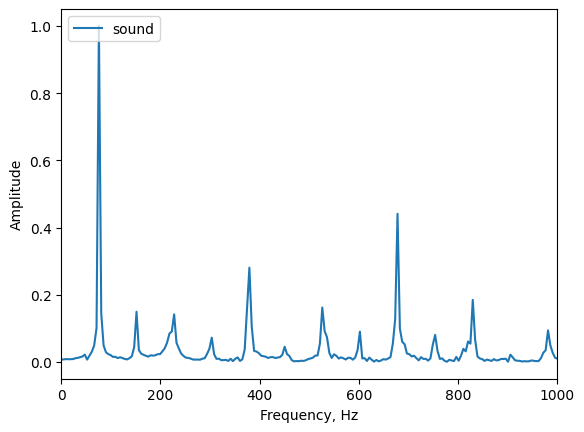

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.signal import argrelextrema
import os

def do_fft(infile):
    sampFreq, sound = wavfile.read(infile)
    #sound = sound / 2.0**15
    
    if len(sound.shape)==2:
        signal = sound[:,0]
    else:
        signal = sound
    fft_spectrum = np.fft.rfft(signal)
    freq = np.fft.rfftfreq(signal.size, d=1./sampFreq)

    fft_spectrum_abs = np.abs(fft_spectrum)
    fft_spectrum_abs /= fft_spectrum_abs.max()
    return freq, fft_spectrum_abs

#infile = "samples/kizimkazi1/hit1.wav"
#freq, fft_spectrum_abs = do_fft(infile)
#plt.plot(freq, fft_spectrum_abs, label="impedance")

infile = "samples/kizimkazi1/short_audio_zunge_hinten.wav"
freq, fft_spectrum_abs = do_fft(infile)
plt.plot(freq, fft_spectrum_abs, label="sound")

plt.xlim((0,1000))
plt.legend(loc="upper left")


plt.xlabel("Frequency, Hz")
plt.ylabel("Amplitude")
plt.show()


In [127]:
import scipy
sampFreq, sound = wavfile.read(infile)
scipy.fftpack.fft(sound)

array([2.96329907e+09-0.00000000e+00j, 2.97052872e+09+4.10094102e+08j,
       3.37365356e+09+6.37165700e+08j, ...,
       3.12937793e+09-9.85417324e+08j, 3.37365356e+09-6.37165700e+08j,
       2.97052872e+09-4.10094102e+08j])

In [86]:
import sys
sys.path.append('../../')
from cad.calc.geo import Geo
import pandas as pd
import seaborn as sns

(0.0, 1000.0)

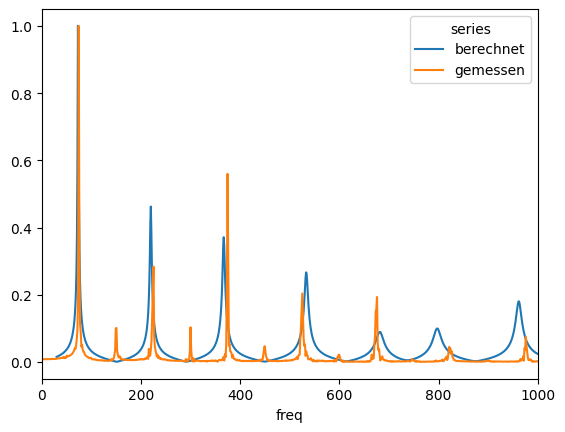

In [105]:
geo = [[0, 32], [28.168640655532794, 31.86611180428472], [690.1940655809578, 29.538748260715735], [736.4892210991227, 29.353857481067042], [814.6675029752355, 29.147364253372423], [815.3499522740153, 29.013456769522936], [820.9317386271148, 33.24770901059784], [826.5135249802142, 37.1315132949651], [832.0953113333137, 40.34928004544565], [837.6770976864132, 42.63978705398563], [843.2588840395126, 43.81725153791858], [848.8406703926121, 43.78626475135114], [854.4224567457115, 42.54938866869964], [860.004243098811, 40.20681005813917], [863.3867993281975, 41.78157601678132], [865.5860294519105, 36.948091179841676], [871.1678158050099, 33.036696174253755], [874.8779964649467, 30.020537298658073], [876.7496021581094, 28.82365878958984], [922.9114309440245, 28.657061972637162], [939.7823713143943, 28.87478339085379], [952.8251945487726, 29.399748999829388], [982.6812827267215, 30.595457011762722], [989.4226952390329, 29.93478074849905], [1020.075373500588, 29.909007863461362], [1067.484656310215, 30.995134019354346], [1091.9941021717977, 32.06809472008781], [1107.3415900058833, 33.13181127736537], [1118.0161140190492, 34.188412402107424], [1125.9503918627215, 35.23923514169973], [1132.1244937900212, 36.285196987394876], [1137.0928326649887, 37.32696631417824], [1142.0909032423453, 42.527338744891566], [1142.6288812757555, 44.274815777328364], [1143.6795199638118, 39.32696631417824]]
geo = Geo(geo)
cadsd = geo.get_cadsd()
impedance_spectrum=cadsd.get_impedance_spektrum()
impedance_spectrum.impedance /= impedance_spectrum.impedance.max()
impedance_spectrum["series"] = "berechnet"

infile = "samples/kizimkazi1/short_audio_zunge_vorne.wav"
freq, fft_spectrum_abs = do_fft(infile)
series = ["gemessen"]*len(freq)
df1 = pd.DataFrame(zip(freq, fft_spectrum_abs, series), columns=["freq", "impedance", "series"])

df = pd.concat((impedance_spectrum, df1))
sns.lineplot(df, x="freq", y="impedance", hue="series")
plt.ylabel("")
plt.xlim(0,1000)

In [101]:
cadsd

0.0 0.032
0.028168640655532793 0.03186611180428472
0.6901940655809579 0.029538748260715734
0.7364892210991227 0.02935385748106704
0.8146675029752355 0.029147364253372422
0.8153499522740153 0.029013456769522935
0.8209317386271148 0.033247709010597835
0.8265135249802142 0.037131513294965106
0.8320953113333137 0.040349280045445655
0.8376770976864132 0.04263978705398563
0.8432588840395127 0.04381725153791858
0.8488406703926121 0.04378626475135114
0.8544224567457115 0.042549388668699645
0.860004243098811 0.04020681005813917
0.8633867993281975 0.04178157601678132
0.8655860294519104 0.03694809117984168
0.8711678158050099 0.033036696174253755
0.8748779964649467 0.030020537298658074
0.8767496021581094 0.02882365878958984
0.9229114309440245 0.028657061972637163
0.9397823713143942 0.028874783390853788
0.9528251945487727 0.02939974899982939
0.9826812827267215 0.030595457011762722
0.9894226952390329 0.029934780748499052
1.0200753735005879 0.029909007863461363
1.0674846563102152 0.030995134019354345

In [44]:
import sys
sys.path.append('../../src/')


2

In [60]:
!ls ../../

assets             cad                getting_started.py
bin                config.ini         requirements.txt
blender            experiments        test.py


In [ ]:

fig, axs = plt.subplots(2, 3)

i=0
indir = "samples/kizimkazi1"
for file in os.listdir(indir):
    if file[-4:] != ".wav":
        continue
    x=i%2
    y=int(np.floor(i/2))
    ax = axs[x,y]

    freq, fft_spectrum_abs = do_fft(os.path.join(indir, file))

    ax.set_xlim((0,1000))
    ax.plot(freq, fft_spectrum_abs)
    ax.set_xlabel("frequency, Hz")
    ax.set_ylabel("Amplitude, units")
    ax.set_title(file)
    i+=1
plt.show()
    
    


In [121]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
fs, data = wavfile.read("samples/kizimkazi1/short_audio_zunge_hinten.wav") # load the data

a = data.T # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
#plt.plot(abs(c[:(d-1)]),'r') 
#plt.show()


5061.5

Frequency sampling 48000
Channels 1
Complete Samplings N 10125
secs 0.2109375
Timestep between samples Ts 2.0833333333333333e-05


/var/folders/x2/b40hstxn35z830rfs3b1ncrc0000gp/T/ipykernel_89961/3842434005.py:20: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray


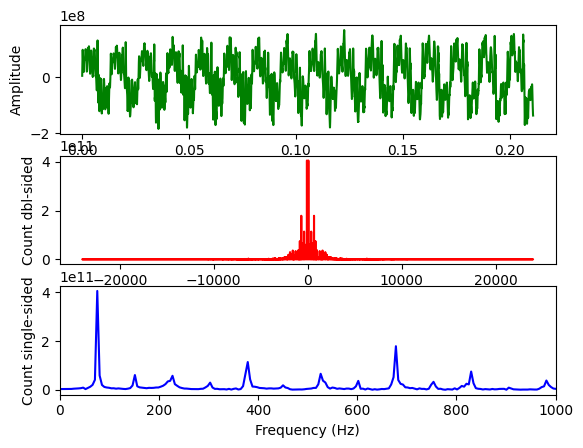

In [135]:
from __future__ import print_function
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack
import numpy as np
from matplotlib import pyplot as plt

fs_rate, signal = wavfile.read("samples/kizimkazi1/short_audio_zunge_hinten.wav")
print ("Frequency sampling", fs_rate)
l_audio = len(signal.shape)
print ("Channels", l_audio)
if l_audio == 2:
    signal = signal.sum(axis=1) / 2
N = int(signal.shape[0])
print ("Complete Samplings N", N)
secs = N / float(fs_rate)
print ("secs", secs)
Ts = 1.0/fs_rate # sampling interval in time
print ("Timestep between samples Ts", Ts)
t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
FFT = abs(scipy.fftpack.fft(signal))
FFT_side = FFT[range(int(N/2))] # one side FFT range
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
fft_freqs = np.array(freqs)
freqs_side = freqs[range(int(N/2))] # one side frequency range
fft_freqs_side = np.array(freqs_side)
plt.subplot(311)
p1 = plt.plot(t, signal, "g") # plotting the signal
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(312)
p2 = plt.plot(freqs, FFT, "r") # plotting the complete fft spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count dbl-sided')
plt.subplot(313)
p3 = plt.plot(freqs_side, abs(FFT_side), "b") # plotting the positive fft spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')
plt.xlim(0,1000)
plt.show()


In [131]:
N

10125

TypeError: list indices must be integers or slices, not tuple